In [1]:
import pandas as pd
import numpy as np
import math as mat
from sklearn import preprocessing
from matplotlib import pyplot as plt

header = ['srcip', 'sport', 'dstip', 'dsport', 'proto',
          'state', 'dur', 'sbytes', 'dbytes', 'sttl',
          'dttl', 'sloss', 'dloss', 'service', 'Sload',
          'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin',
          'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
          'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime',
          'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
          'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
          'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
          'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label'
         ]
data = pd.read_csv(r'D:\College Education\Semester 5\19CSE301 Computer Networks\Project\UNSW-NB15_1.csv', names = header)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9312\3947375972.py:18: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'D:\College Education\Semester 5\19CSE301 Computer Networks\Project\UNSW-NB15_1.csv', names = header)


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,0,3,7,1,3,1,1,1,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,0,2,4,2,3,1,1,2,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,0,12,8,1,2,2,1,1,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,0,6,9,1,1,1,1,1,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,0,7,9,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,0.020383,320,1874,31,...,0,0,8,20,7,5,1,1,4,0
699997,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,1.402957,19410,1087890,31,...,0,0,1,1,2,7,2,2,2,0
699998,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,0.007108,2158,2464,31,...,0,0,13,13,6,7,2,1,2,0
699999,59.166.0.6,30388,149.171.126.5,111,udp,CON,0.004435,568,304,31,...,0,0,10,13,6,5,1,1,3,0


In [2]:
print(data.nunique())

srcip                   40
sport                84302
dstip                   44
dsport               77499
proto                  135
state                   16
dur                 243828
sbytes                7948
dbytes               11898
sttl                    13
dttl                    11
sloss                  275
dloss                  572
service                 13
Sload               391840
Dload               403499
Spkts                  715
Dpkts                 1086
swin                    12
dwin                     4
stcpb               441843
dtcpb               441640
smeansz               1288
dmeansz               1356
trans_depth              6
res_bdy_len            543
Sjit                426221
Djit                454152
Stime                27568
Ltime                27566
Sintpkt             350430
Dintpkt             351748
tcprtt               17050
synack               15769
ackdat               13690
is_sm_ips_ports          2
ct_state_ttl             7
c

In [3]:
data.replace(to_replace = '-', value = np.nan, inplace = True)
data.isna().sum()
data.dropna(axis = 0, inplace = True)

data.drop_duplicates(inplace = True)

data

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,0,3,7,1,3,1,1,1,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,0,12,8,1,2,2,1,1,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,0,6,9,1,1,1,1,1,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,0,7,9,1,1,1,1,1,0
6,59.166.0.6,2142,149.171.126.4,53,udp,CON,0.001134,132,164,31,...,0,0,12,7,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699865,59.166.0.5,51051,149.171.126.9,21,tcp,FIN,1.419832,2934,3742,31,...,1,1,1,1,2,6,1,1,2,0
699905,59.166.0.0,34380,149.171.126.4,21,tcp,FIN,1.423697,2934,3742,31,...,1,1,1,1,8,4,1,1,3,0
699916,59.166.0.4,53532,149.171.126.6,53,udp,CON,0.001028,146,178,31,...,0,0,1,1,6,4,3,2,2,0
699992,59.166.0.3,48114,149.171.126.3,53,udp,CON,0.001026,146,178,31,...,0,0,1,1,6,5,3,2,2,0


In [4]:
data.dtypes

srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

In [5]:
numerical_columns = ['dur', 'sbytes', 'dbytes', 'Sload', 'Dload',
                     'Spkts', 'Dpkts', 'stcpb', 'dtcpb',
                     'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt',
                     'Dintpkt', 'tcprtt', 'synack', 'ackdat'
                    ]
categorical_columns = ['srcip', 'dstip', 'sport', 'dsport', 'proto', 'state',
                       'sttl', 'dttl', 'sloss', 'dloss',
                       'service', 'swin', 'dwin', 'trans_depth', 'res_bdy_len',
                       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
                       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
                       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label'
                      ]

data['sport'] = data['sport'].astype(str).astype(float)
data['dsport'] = data['dsport'].astype(str).astype(float)

In [6]:
label_encoder = preprocessing.LabelEncoder()
for cols in categorical_columns:
    data[cols] = label_encoder.fit_transform(data[cols])

scaler = preprocessing.StandardScaler()
for col in numerical_columns:
    data[[col]] = scaler.fit_transform(data[[col]].values.reshape(-1, 1))
data

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,10,370,16,3,1,2,-0.274044,-0.130937,-0.179180,0,...,0,0,2,6,0,2,0,0,0,0
2,16,444,17,3,1,2,-0.274016,-0.130616,-0.179098,0,...,0,0,11,7,0,1,1,0,0,0
3,15,2541,15,3,1,2,-0.273975,-0.130937,-0.179180,0,...,0,0,5,8,0,0,0,0,0,0
4,13,47519,0,3,1,2,-0.273993,-0.130616,-0.179098,0,...,0,0,6,8,0,0,0,0,0,0
6,16,1119,14,3,1,2,-0.274009,-0.130937,-0.179180,0,...,0,0,11,6,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699865,15,48860,19,0,0,3,0.361331,-0.066676,-0.158218,0,...,1,1,0,0,1,5,0,0,1,0
699905,10,32610,14,0,0,3,0.363061,-0.066676,-0.158218,0,...,1,1,0,0,7,3,0,0,2,0
699916,14,51282,16,3,1,2,-0.274056,-0.130616,-0.179098,0,...,0,0,0,0,5,3,2,1,1,0
699992,13,46008,13,3,1,2,-0.274057,-0.130616,-0.179098,0,...,0,0,0,0,5,4,2,1,1,0


In [7]:
data[numerical_columns].describe()

,dur,sbytes,dbytes,Sload,Dload,Spkts,Dpkts,stcpb,dtcpb,smeansz,dmeansz,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat
count,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05,2.522130e+05
mean,7.922059e-17,3.662403e-18,2.287593e-17,1.532575e-17,-8.096727e-17,8.113630e-18,-1.419885e-17,9.387020e-17,-1.391713e-17,5.871113e-17,-1.803029e-18,-6.941662e-17,2.591854e-17,-5.841886e-13,8.282113e-12,-3.245452e-17,-7.775563e-18,-3.200376e-17,2.163635e-17,-4.868178e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.745166e-01,-1.326797e-01,-1.801406e-01,-1.279056e-01,-4.456391e-01,-3.653950e-01,-2.960129e-01,-8.665943e-01,-8.655088e-01,-5.861917e-01,-8.286016e-01,-2.910306e-01,-3.356023e-01,-1.745833e+00,-1.745913e+00,-1.859443e-01,-1.678935e-01,-1.284452e-01,-1.350686e-01,-1.131089e-01
25%,-2.740388e-01,-1.306156e-01,-1.790978e-01,-1.272194e-01,-4.057173e-01,-3.509523e-01,-2.794529e-01,-8.665943e-01,-8.655088e-01,-4.840276e-01,-5.526194e-01,-2.910306e-01,-3.356023e-01,-7.541471e-01,-7.542280e-01,-1.858635e-01,-1.678299e-01,-1.284452e-01,-1.350686e-01,-1.131089e-01
50%,-2.668681e-01,-1.242400e-01,-1.753131e-01,-1.114993e-01,-1.187467e-01,-2.642961e-01,-2.297729e-01,-4.863498e-01,-4.867048e-01,-4.468770e-01,-5.253619e-01,-2.869572e-01,-3.353561e-01,5.812208e-02,5.816595e-02,-1.821105e-01,-1.637306e-01,-8.685299e-02,-7.211651e-02,-9.680554e-02
75%,1.311262e-01,-6.667617e-02,-1.284438e-01,-1.094801e-01,-7.719859e-02,-1.776399e-01,-1.469729e-01,8.422464e-01,8.394982e-01,-1.868230e-01,2.752250e-03,-1.823638e-02,-2.904476e-01,8.631142e-01,8.630319e-01,4.460767e-02,8.838950e-02,-8.198366e-02,-6.426386e-02,-9.445786e-02
max,2.659523e+01,2.241401e+02,8.568091e+01,7.481780e+01,1.148378e+01,1.056296e+02,9.053556e+01,2.166045e+00,2.165850e+00,6.179858e+00,4.282180e+00,1.207387e+02,1.748106e+02,1.820924e+00,1.820841e+00,2.818413e+02,3.053639e+02,3.631346e+01,4.190081e+01,4.824878e+01


In [8]:
data[categorical_columns].mode()

,srcip,dstip,sport,dsport,proto,state,sttl,dttl,sloss,dloss,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
0,10,14,45351,3,0,3,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


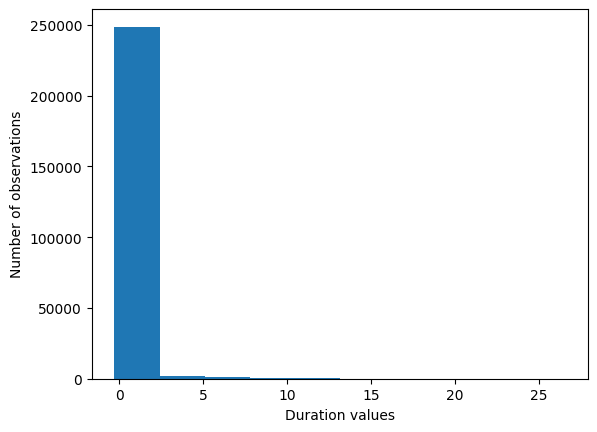

In [9]:
plt.hist(data['dur'])
plt.xlabel("Duration values")
plt.ylabel("Number of observations")
plt.show()

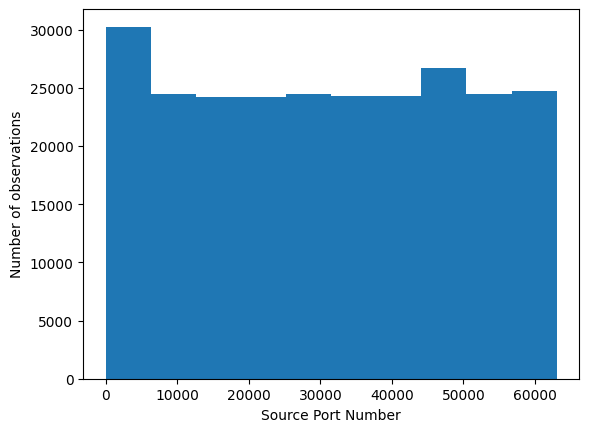

In [10]:
plt.hist(data['sport'])
plt.xlabel("Source Port Number")
plt.ylabel("Number of observations")
plt.show()

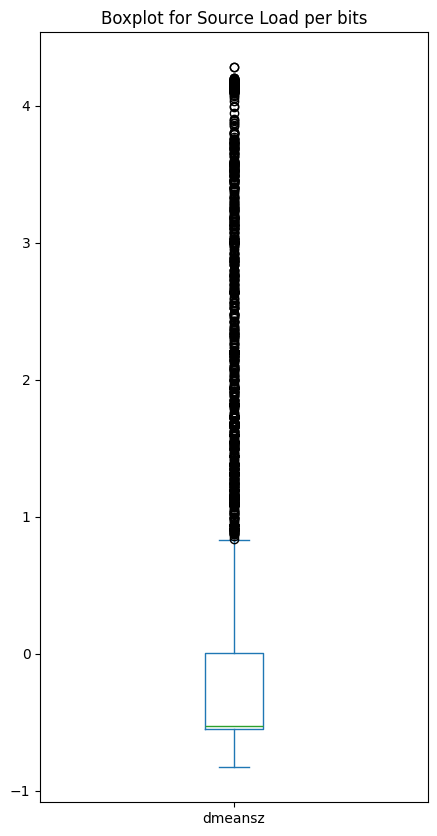

In [11]:
plt.figure(figsize=(5, 10))

ax = data['dmeansz'].plot(kind='box', title='Boxplot for Source Load per bits')

plt.show()

<Figure size 500x1000 with 0 Axes>

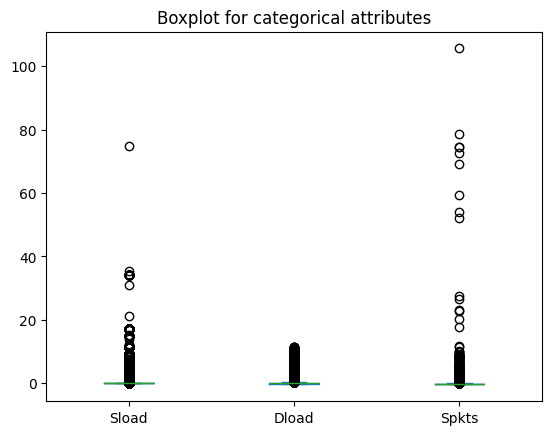

In [12]:
plt.figure(figsize=(5, 10))

ax = data[['Sload', 'Dload', 'Spkts']].plot(kind='box', title='Boxplot for categorical attributes')

plt.show()

<Figure size 500x1000 with 0 Axes>

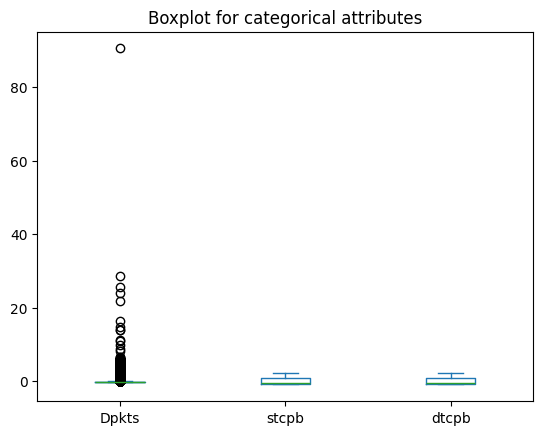

In [13]:
plt.figure(figsize=(5, 10))

ax = data[['Dpkts', 'stcpb', 'dtcpb']].plot(kind='box', title='Boxplot for categorical attributes')

plt.show()

<Figure size 500x1000 with 0 Axes>

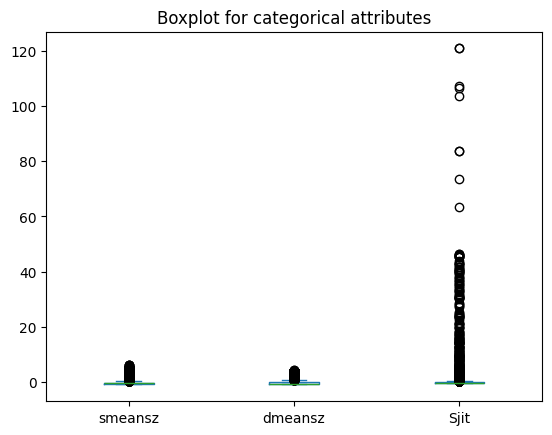

In [14]:
plt.figure(figsize=(5, 10))

ax = data[['smeansz', 'dmeansz', 'Sjit']].plot(kind='box', title='Boxplot for categorical attributes')

plt.show()

<Figure size 500x1000 with 0 Axes>

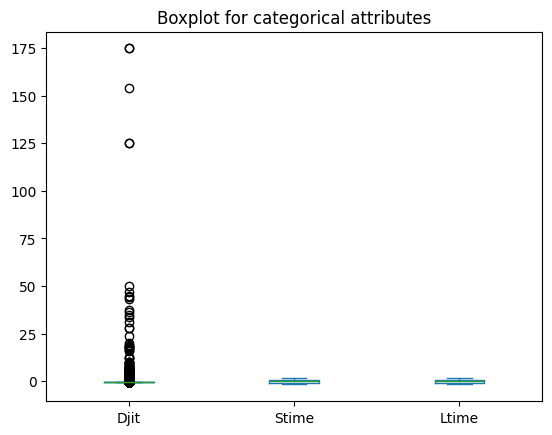

In [15]:
plt.figure(figsize=(5, 10))

ax = data[['Djit', 'Stime', 'Ltime']].plot(kind='box', title='Boxplot for categorical attributes')

plt.show()

<Figure size 500x1000 with 0 Axes>

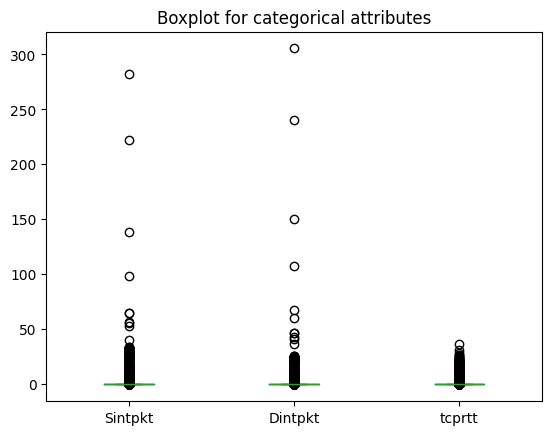

In [16]:
plt.figure(figsize=(5, 10))

ax = data[['Sintpkt', 'Dintpkt', 'tcprtt']].plot(kind='box', title='Boxplot for categorical attributes')

plt.show()

<Figure size 500x1000 with 0 Axes>

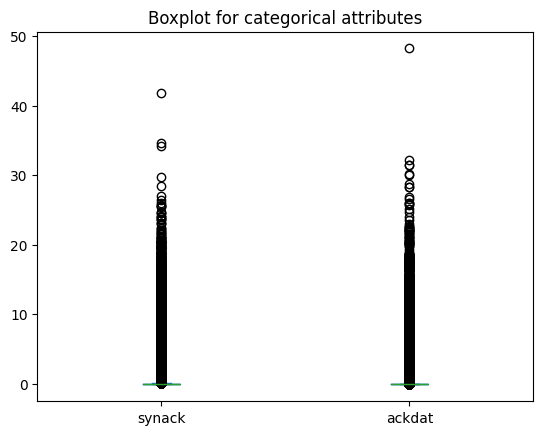

In [17]:
plt.figure(figsize=(5, 10))

ax = data[['synack', 'ackdat']].plot(kind='box', title='Boxplot for categorical attributes')

plt.show()